In [92]:
#Importing necessary libraries
#import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
#import string
import matplotlib.pyplot as plt

In [93]:
#loading the data set
df = pd.read_csv('C:/Users/DELL/Desktop/14_naive_bayes/spam.csv')

# DATA EXPLORATION

In [94]:
#finding the number of rows and colums present in the dataframe
df.shape

(5572, 2)

In [95]:
#printing the names of the columns in the dataset
print("Column names: ",list(df.columns))

Column names:  ['Category', 'Message']


In [96]:
#printing the first five rows of the dataframe 
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
#Finding the data types of each column
df.dtypes

Category    object
Message     object
dtype: object

In [98]:
#Converting spams to 1 and ham to 0
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head(5)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [99]:
#counting the number of genuine and fradulent Transactions
n_ham=len(df[df['spam']==0])
n_spam=len(df[df['spam']==1])

#displaying the number of genuine and fraudulent Transcations
print(' Genuine Transactions: ',n_ham)
print(' Fradulent Transactions: ',n_spam)

 Genuine Transactions:  4825
 Fradulent Transactions:  747


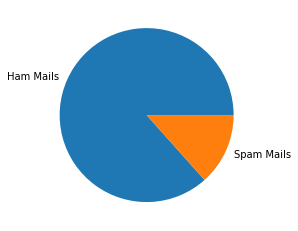

In [100]:
#plotting the pie plot of genuine and fraudulent transactions

plt.pie([n_ham,n_spam],labels=['Ham Mails','Spam Mails'],radius=1)
plt.show()

In [101]:
#Finding the number of null values in each column
df.isnull().sum()

Category    0
Message     0
spam        0
dtype: int64

# DATA PREPROCESSING

In [102]:
#Finding the number of duplicates
df.duplicated().sum()

415

In [103]:
#Deleting the duplicate rows
df.drop_duplicates(inplace = True)

In [104]:
#Finding the shape after removal of dulicates
df.shape

(5157, 3)

In [105]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
def process_text(Message):
    
    #1 Remove Punctuation marks 
    nopunc = [char for char in Message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

In [107]:
#displaying first five rows of message column after tokenization
df['Message'].head().apply(process_text)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['Message'])
#print(messages_bow)

In [110]:
messages_bow.shape

(5157, 11422)

# BUILDING MODEL 

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['spam'], test_size = 0.20, random_state = 0)

In [112]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [113]:
#Print the predictions
print(classifier.predict(X_train))
#Print the actual values
print(y_train.values)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


In [114]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3619
           1       0.98      0.97      0.98       506

    accuracy                           0.99      4125
   macro avg       0.99      0.99      0.99      4125
weighted avg       0.99      0.99      0.99      4125

Confusion Matrix: 
 [[3611    8]
 [  13  493]]

Accuracy:  0.9949090909090909


In [115]:
#Print the predictions
print('Predicted value: ',classifier.predict(X_test))
#Print Actual Label
print('Actual value: ',y_test.values)

Predicted value:  [0 0 0 ... 0 0 0]
Actual value:  [0 0 0 ... 0 0 0]


In [116]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       0.81      0.93      0.86       135

    accuracy                           0.96      1032
   macro avg       0.90      0.95      0.92      1032
weighted avg       0.96      0.96      0.96      1032

Confusion Matrix: 
 [[867  30]
 [ 10 125]]

Accuracy:  0.9612403100775194
